Dataset: **Airline Passengers** \
the monthly number of airline passengers between 1949 and 1960

Model: Prophet

Type: Univariate

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# !pip install pandas matplotlib numpy cython
# !pip install pystan
# !pip install prophet

In [3]:
%matplotlib inline
import pandas as pd
from prophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('../../datasets/AirPassengers.csv')

df.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
# check Month column to be of the datetiem type
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [6]:
# convert Month column to datetime
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [7]:
# change the time column as **ds** and the metric column as **y**
df = df.rename(columns={'Month': 'ds',
                        '#Passengers': 'y'})
df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


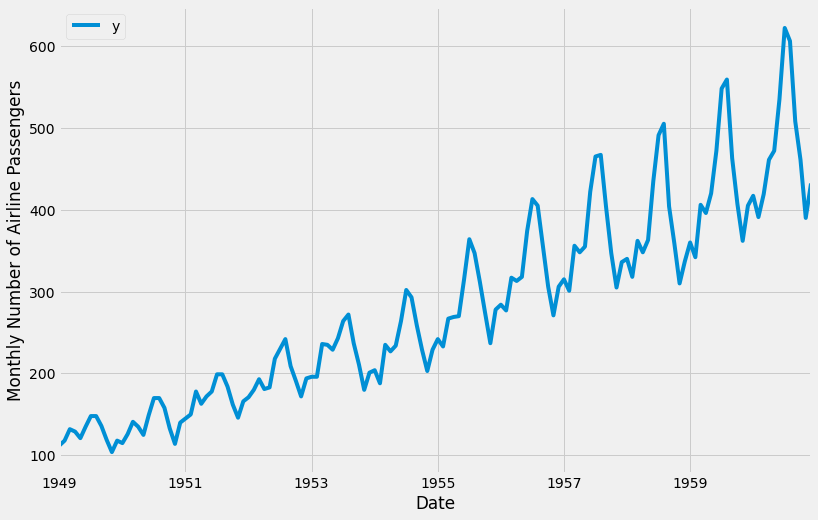

In [8]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

### Time Series Forecasting with Prophet

In [9]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [10]:
my_model.fit(df)

05:17:18 - cmdstanpy - INFO - Chain [1] start processing
05:17:19 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [12]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,650.181732,605.600128,697.254316
176,1963-09-01,602.897520,559.099595,648.770723
177,1963-10-01,566.672579,522.202048,611.513857
178,1963-11-01,534.836844,492.248893,578.633194
179,1963-12-01,564.498004,518.936823,605.579959


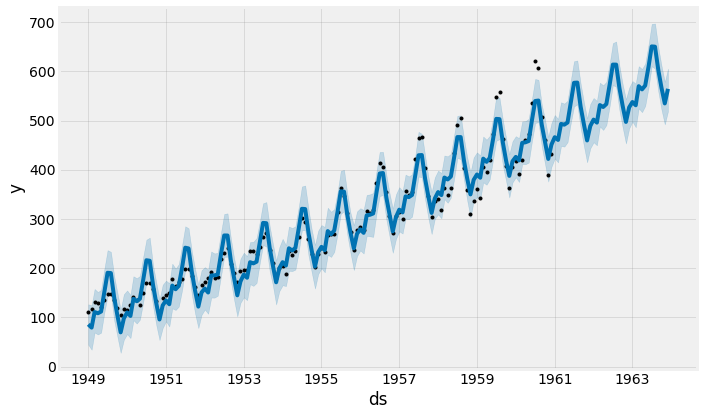

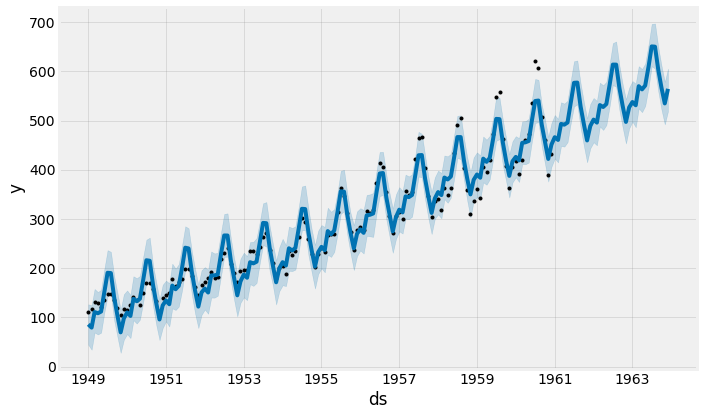

In [13]:
my_model.plot(forecast,
              uncertainty=True)

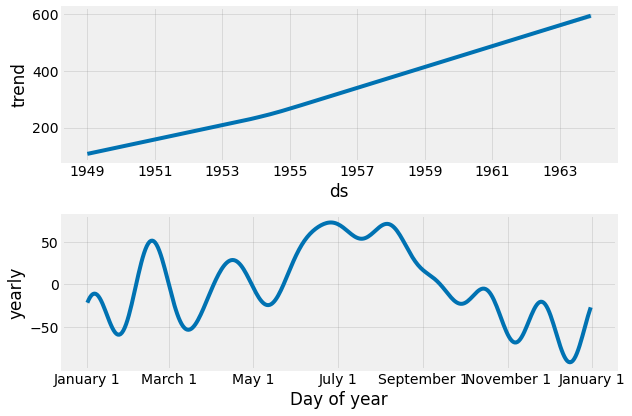

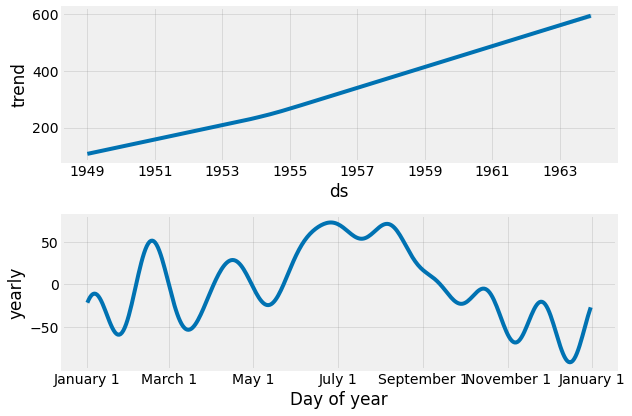

In [14]:
my_model.plot_components(forecast)

Reference: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3

In [17]:
# splitting the dataset into training and testing 
train_size = int(len(df) * 0.66)
test_size = len(df) - train_size

train, test = df[0:train_size], df[train_size:len(df)]

print(len(train), len(test))

95 49


In [27]:
print(test.dtypes)

ds    datetime64[ns]
y              int64
dtype: object


In [28]:
test.index

RangeIndex(start=95, stop=144, step=1)

In [21]:
# Note: Prophet object can only be fit once. Instantiate a new object.
FBmodel = Prophet()
FBmodel.fit(train)

05:28:25 - cmdstanpy - INFO - Chain [1] start processing
05:28:25 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
train_prediction = FBmodel.predict(train) 
test_prediction = FBmodel.predict(test)

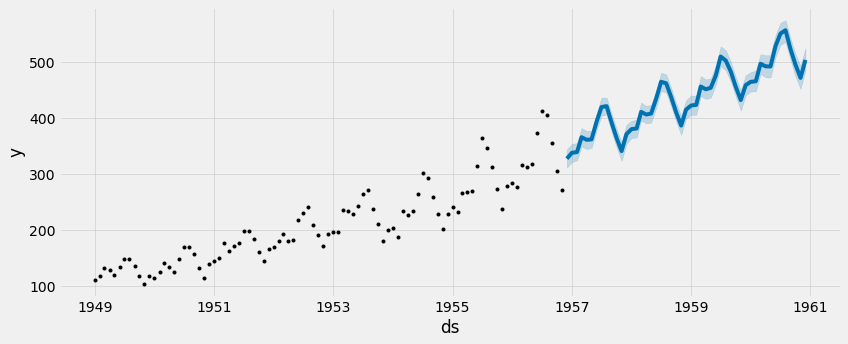

In [23]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(12)
fig = FBmodel.plot(test_prediction,
                 ax=ax)
plt.show()

In [25]:
test['y'].head()

95    306
96    315
97    301
98    356
99    348
Name: y, dtype: int64

In [26]:
test.index

RangeIndex(start=95, stop=144, step=1)

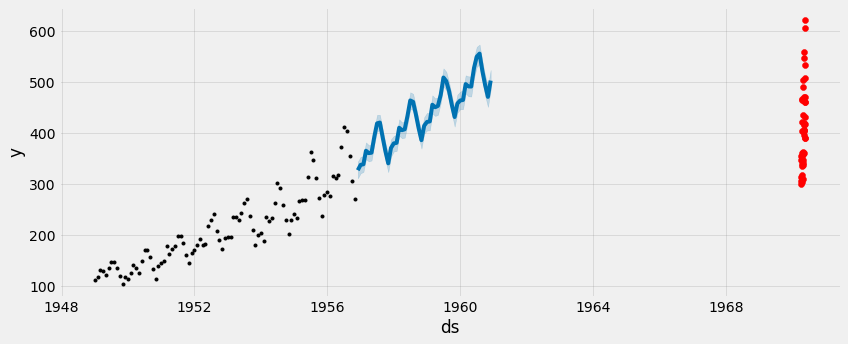

In [32]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(12)
ax.scatter(test.index, test['y'], color='r')
fig = FBmodel.plot(test_prediction, ax=ax)

In [35]:
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(train['y'], train_prediction['yhat']))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test['y'], test_prediction['yhat']))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 12.59 RMSE
Test Score: 47.54 RMSE


In [36]:
from sklearn.metrics import r2_score
score = r2_score(test['y'], test_prediction['yhat'])
print("R2 score is: ", score)

R2 score is:  0.6319558371840798


In [38]:
# Forecast for the next 2 years 
FBmodel_final = Prophet()
FBmodel_final.fit(df)

05:50:29 - cmdstanpy - INFO - Chain [1] start processing
05:50:29 - cmdstanpy - INFO - Chain [1] done processing


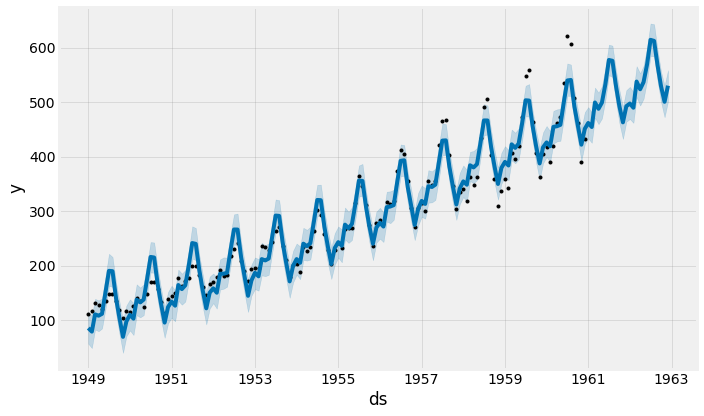

In [39]:
future = FBmodel_final.make_future_dataframe(periods=24, freq='1M')
forecast = FBmodel_final.predict(future)
FBmodel_final.plot(forecast)
plt.show() 